In [40]:
#importing dependencies
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline

In [41]:
#using pandas to read the database stored in the same folder
data = pd.read_csv('mnist_train.csv')

In [42]:
# viewing column heads
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
# extracting data from the dataset and viewing them up close
a = data.iloc[3,1:].values

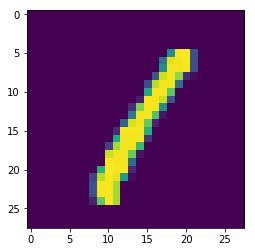

In [44]:
#reshaping the extracted data into a reasonable size
a = a.reshape(28,28).astype('uint8')
plt.imshow(a)

In [45]:
# preparing the data
# seprating labels and data values
df_x = data.iloc[:,1:]
df_y = data.iloc[:,0]


In [46]:
# creating test and train sizes/batches
x_train,x_test,y_train,y_test = train_test_split(df_x,df_y, test_size = 0.2,random_state=4)

In [47]:
#check data 
x_train.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
20379,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53032,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30510,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
508,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
#check data 
y_train.head()

20379    4
53032    4
27005    7
30510    8
508      1
Name: label, dtype: int64

In [49]:
# call rf classifier
rf = RandomForestClassifier(n_estimators=100)

In [50]:
# fit the model
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [51]:
#pediction on test data
pred = rf.predict(x_test)

In [52]:
pred

array([2, 7, 6, ..., 6, 4, 2], dtype=int64)

In [55]:
# check prediction accuracy
s = y_test.values

# calculate number of correctly predicted values
count=0
for i in range (len(pred)):
    if pred[i] == s[i]:
        count = count+1

In [56]:
count

11624

In [57]:
#total values that to prediction code was run on
len(pred)

12000

In [58]:
# accuracy value
11624/12000

0.9686666666666667